<a href="https://colab.research.google.com/github/agusconde18/conde-pes-2024/blob/main/Tp1_Python_correccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Nº 1

Objetivos:
* Aplicar conceptos de procesamiento de señales en python, como convolución.
* Familiarizarse con el entorno de desarrollo de python notebooks

## Ejercicios
1- Encontrar la función de transferencia del moving average. (Para esto deben definir un algoritmo de moving average y extraer su firma/transferencia).

2- Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de amplitud 1 y frecuencia 1KHz. Analizar los resultados.

3- Realizar un algoritmo de convolución en float y en punto fijo (por ejemplo usando 'fixedpoint'), comparar tiempos y error a la salida. (Compararlo con np.convolve). Sacar conclusiones sobre los resultados.
Medir tiempos de computo con el método: timeit de la lib timeit de la siguiente forma:

In [ ]:
!pip install fixedpoint==1.0.0

In [ ]:
%pylab inline
import timeit
import time
import numpy as np

t = np.arange(0, 1024/20000, 1/20000)
s1= np.sin(2*np.pi*1000*t)+1
s2 = np.sin(2*np.pi*1200*t)

# METODO 1 de medición de tiempos

# Este wrapper empaqueta funciones para que el timeit pueda medir solo eso
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped

conv = wrapper(np.convolve, s1, s2)
print (timeit.timeit(conv, number=1))

# METODO 2 de medición de tiempos
start = time.time()
conv_r = np.convolve(s1,s2)
end = time.time()
print (end-start)



Populating the interactive namespace from numpy and matplotlib
0.00033763099997941026
0.0004677772521972656


La diferencia en la medición depende de la carga de la CPU y que el primer método mide solamente la función pedida. Usar uno de los 2 para realizar la medición, como la medición es comparativa, solo importa usar el mismo método para todo, los valores absolutos no importan.



---
1- Encontrar la función de transferencia del moving average. (Para esto deben definir un algoritmo de moving average y extraer su firma/transferencia).



In [ ]:
import pandas as pd
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
#1- Encontrar la función de transferencia del moving average. (Para esto deben definir un algoritmo de moving average y extraer su firma/transferencia).
# Metodo sin hacer uso de la convoulcion.
def moving_average(signal, window_size):
  salida = pd.Series()
  for _, index in enumerate(range(len(signal))):
    salida[index] = signal[index:index + window_size].mean()
  return salida

Obtencion de firma de moving average

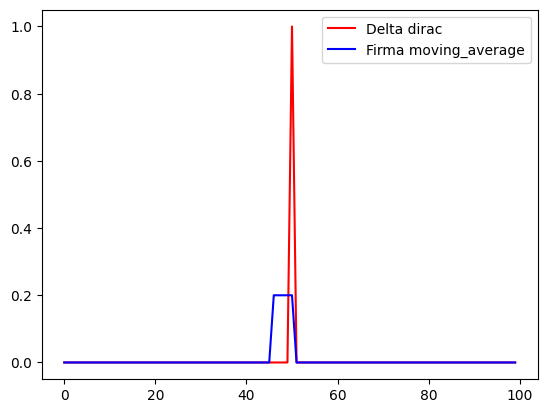

In [ ]:
# Defino delta de dirac:
import scipy.signal as sig
import matplotlib.pyplot as plt

t = np.arange(0, 100, 1)

dirac = np.zeros(len(t))
dirac[int(len(t)/2)] = 1

# Obtengo firma:
firma = moving_average(dirac, 5)

plt.plot(t, dirac, 'r', label='Delta dirac')
plt.plot(t, firma, 'b', label='Firma moving_average')

plt.legend()
plt.show()



---


2- Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de amplitud 1 y frecuencia 1KHz.
  
Analizar los resultados.

In [ ]:
#def para todas las señales
ciclos = 5
paso = 0.1
tMaxFrec = 1 / 2000;

Señal cuadrada, ancho de ventana 5

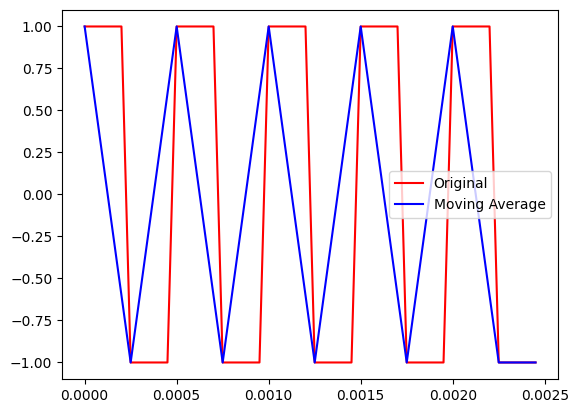

In [ ]:
#Square signal 2kHz
ySquare = sig.square(2 * np.pi  * np.arange(0, ciclos, paso), duty = 0.5)
xSquare = np.arange(0, ciclos * tMaxFrec, (ciclos * tMaxFrec) / len(ySquare) );
ySquareMA = moving_average(ySquare, 5)
#plot en rojo normal, en azul con moving_average
plt.plot(xSquare, ySquare, 'r', label='Original')
plt.plot(xSquare, ySquareMA, 'b', label='Moving Average')
plt.legend()
plt.show()

Señal triangular 1kHz ancho de ventana 5

Se observa que realizando dicho filtrado de "moving average" se termina de una forma "integrando" de forma parcial, pero con el beneficio de eliminar el ruido rapido si la ventana es chica, en cambio si la ventana es ancha corremos un riesgo alto de deformar notablemente la señal de entrada.


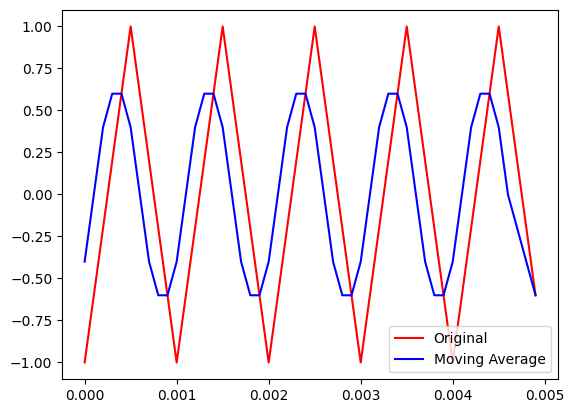

In [ ]:
#Señal triangular 1kHz
tMaxFrec = 1 / 1000;

yTriangle = sig.sawtooth(2 * np.pi  * np.arange(0, ciclos, paso), width = 0.5)
xTriangle = np.arange(0, ciclos * tMaxFrec, (ciclos * tMaxFrec) / len(yTriangle) );
yTriangleMA = moving_average(yTriangle, 4)

plt.plot(xTriangle, yTriangle, 'r', label='Original')
plt.plot(xTriangle, yTriangleMA, 'b', label='Moving Average')
plt.legend()
plt.show()

Se mantiene la misma logica anteriormente mencionada para la onda cuadrada, el ancho de la centana es muy importante a tener en cuenta.


---



3- Realizar un algoritmo de convolución en float y en punto fijo (por ejemplo usando 'fixedpoint'), comparar tiempos y error a la salida. (Compararlo con np.convolve).

Sacar conclusiones sobre los resultados.

In [ ]:
#Definicion de metodo custom haciendo uso de float

def custom_conv_custom(signal1, signal2):
    len1, len2 = len(signal1), len(signal2)

    result = [0] * (len1 + len2 - 1)

    range1, range2 = range(len1), range(len2)

    for i in range1:
        for j in range2:
          result[i + j] += signal1[i] * signal2[j]

    return result

In [ ]:
from fixedpoint import FixedPoint

def custom_conv_custom_fixedpoint(signal1, signal2):

    signal1 = [FixedPoint(i, rounding='convergent') for i in signal1]
    signal2 = [FixedPoint(i, rounding='convergent') for i in signal2]

    len1, len2 = len(signal1), len(signal2)

    result = [FixedPoint(0, rounding='convergent')] * (len1 + len2 - 1)

    range1, range2 = range(len1), range(len2)

    for i in range1:
        for j in range2:
          result[i + j] += signal1[i] * signal2[j]

    return result

In [ ]:
# Elijo usar timeit para probar que metodo es mas rapido
convSign = [0.2,0.2,0.2,0.2,0.2];

# Haciendo esto e ignorando el resultado hace que el resto de ejecuciones den tiempos mas correctos
timeit_conv = wrapper(custom_conv_custom, ySquare, convSign);
(timeit.timeit(timeit_conv, number=3000))
#

cant_exec = 100

timeit_conv = wrapper(custom_conv_custom, ySquare, convSign);
timeCustomConvolution = (timeit.timeit(timeit_conv, number=cant_exec))

timeit_conv = wrapper(custom_conv_custom_fixedpoint, ySquare, convSign);
timeCustomConvolutionFixedPoint = (timeit.timeit(timeit_conv, number=cant_exec))

convNumpy = wrapper(np.convolve, ySquare, convSign);
timeNumpyConvolution = (timeit.timeit(convNumpy, number=cant_exec))

## get data type result
print('Tipo de metodo custom: ', type(custom_conv_custom(ySquare, convSign)[0]))
print('Tipo de metodo custom fixedpoint: ', type(custom_conv_custom_fixedpoint(ySquare, convSign)[0]))
print('Tipo de metodo convolution np: ', type(np.convolve(ySquare, convSign)[0]))

print()

print('Tiempo custom convolution: ', timeCustomConvolution)
print('Tiempo custom convolution fixed point: ', timeCustomConvolutionFixedPoint)
print('Tiempo numpy convolution: ', timeNumpyConvolution)

Tipo de metodo custom:  <class 'numpy.float64'>
Tipo de metodo custom fixedpoint:  <class 'fixedpoint.fixedpoint.FixedPoint'>
Tipo de metodo convolution np:  <class 'numpy.float64'>

Tiempo custom convolution:  0.01629107799999474
Tiempo custom convolution fixed point:  4.733576393000021
Tiempo numpy convolution:  0.0006279759999756607


Podemos observar que el metodo de numpy np.convole, esta mucho mas optimizado, y es mucho mas veloz, respecto al resto de metodos customizados que uno pudiese hacer.

Asimismo se observa que el metodo de "fixedPoint" es el mas lento, debido a que se realiza la conversion de la entrada a fixed point dentro del mismo y demora la ejecucion.

In [ ]:
print('Error custom convolution: ', (np.array(custom_conv_custom(ySquare, convSign)) - np.array(np.convolve(ySquare, convSign))).mean())
print('Error custom convolution fixed point (cuadratico): ', ((np.array([float(i) for i in custom_conv_custom_fixedpoint(ySquare, convSign)]) - np.array(np.convolve(ySquare, convSign)))**2).mean())
print('Error custom convolution fixed point (imprimo valores): ', (np.array([float(i) for i in custom_conv_custom_fixedpoint(ySquare, convSign)]) - np.array(np.convolve(ySquare, convSign))))

Error custom convolution:  0.0
Error custom convolution fixed point (cuadratico):  0.362962962962963
Error custom convolution fixed point (imprimo valores):  [-0.2 -0.4 -0.6 -0.8 -1.  -0.6 -0.2  0.2  0.6  1.   0.6  0.2 -0.2 -0.6
 -1.  -0.6 -0.2  0.2  0.6  1.   0.6  0.2 -0.2 -0.6 -1.  -0.6 -0.2  0.2
  0.6  1.   0.6  0.2 -0.2 -0.6 -1.  -0.6 -0.2  0.2  0.6  1.   0.6  0.2
 -0.2 -0.6 -1.  -0.6 -0.2  0.2  0.6  1.   0.8  0.6  0.4  0.2]


Podemos ver que en el metodo de conversion a fixed point se terminan introduciendo errores respecto a np.convole